In [104]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df = pd.read_csv("project_train.csv")

In [105]:
pd.set_option('display.max_rows', 500)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
0,0.5450,0.88400,5,-4.8070,0,0.3670,0.290000,0.000000,0.3700,0.6410,86.049,1
1,0.7950,0.54500,7,-8.1530,1,0.3430,0.003960,0.000000,0.2730,0.8090,91.967,1
2,0.4890,0.87100,5,-5.8250,1,0.3860,0.002850,0.000004,0.1300,0.3410,117.431,1
3,0.5390,0.93100,4,-1.8030,0,0.2620,0.000713,0.000000,0.2040,0.6850,85.571,0
4,0.9180,0.73400,11,-2.8320,0,0.2690,0.029400,0.000008,0.1910,0.6080,97.044,1
5,0.6500,0.90000,1,-4.0990,0,0.3740,0.025200,0.000000,0.1760,0.6590,89.788,1
6,0.8750,0.74500,1,-5.8780,1,0.2690,0.022700,0.000002,0.2870,0.7490,95.201,1
7,0.7350,0.61200,5,-6.7740,1,0.0517,0.289000,0.000041,0.1030,0.3950,105.056,0
8,0.3910,0.19100,7,-25.0970,1,0.0517,0.977000,0.774000,0.1180,0.4400,99.848,1
9,0.6220,0.93100,9,-3.4120,0,0.0485,0.168000,0.000000,0.3010,0.4550,128.066,0


In [106]:
df[df["Label"]==0].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0
mean,0.627129,0.749610,5.377593,-5.823021,0.605809,0.086618,0.171855,0.043325,0.236708,0.588251,119.238618,0.0
std,0.145869,0.177961,3.586223,2.825303,0.489693,0.101674,0.221701,0.163325,0.229615,0.244225,22.744253,0.0
min,0.129000,0.086900,0.000000,-25.170000,0.000000,0.022600,0.000080,0.000000,0.036800,0.024200,59.972000,0.0
25%,0.539000,0.662000,2.000000,-6.746000,0.000000,0.034000,0.022800,0.000000,0.088900,0.389000,103.051000,0.0
50%,0.648000,0.785000,6.000000,-5.363000,1.000000,0.045900,0.083800,0.000003,0.142000,0.602000,123.975000,0.0
75%,0.730000,0.883000,9.000000,-4.288000,1.000000,0.097000,0.231000,0.000234,0.299000,0.801000,130.008000,0.0
max,0.940000,0.991000,11.000000,4.331000,1.000000,0.925000,0.993000,0.985000,0.992000,0.969000,192.754000,0.0


In [107]:
df[df["Label"]==1].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.0
mean,0.437119,3.547429,4.884298,-38.870494,0.723140,0.124441,0.461122,0.337093,0.193421,0.362002,108.793579,1.0
std,0.180317,47.151473,3.739861,419.864145,0.448374,0.123730,0.435720,0.416003,0.169509,0.246387,30.066923,0.0
min,0.084900,0.009790,0.000000,-6542.000000,0.000000,0.024300,0.000024,0.000000,0.022400,0.037700,44.777000,1.0
25%,0.295750,0.127250,1.000000,-19.207750,0.000000,0.038200,0.015850,0.000002,0.094600,0.140500,85.797000,1.0
50%,0.395000,0.591000,4.000000,-7.257500,1.000000,0.047850,0.292000,0.002740,0.130000,0.331000,100.239500,1.0
75%,0.560000,0.871000,8.000000,-4.512750,1.000000,0.186750,0.962000,0.865750,0.227000,0.566000,130.076250,1.0
max,0.918000,734.000000,11.000000,-0.300600,1.000000,0.484000,0.996000,0.994000,0.982000,0.963000,210.752000,1.0


In [108]:
idx1 = df[df['energy'] == 734].index
idx2 = df[df['loudness'] == -6542].index

df.drop(idx1, inplace = True, axis = 0)
df.drop(idx2, inplace = True, axis = 0)

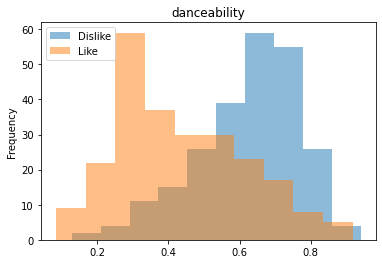

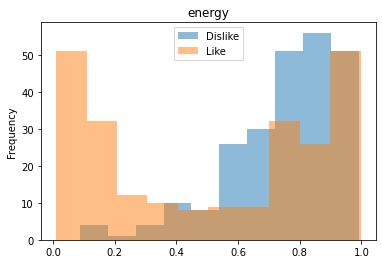

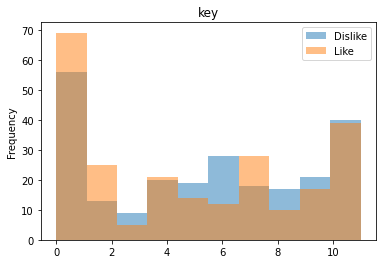

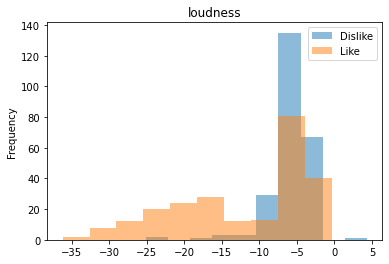

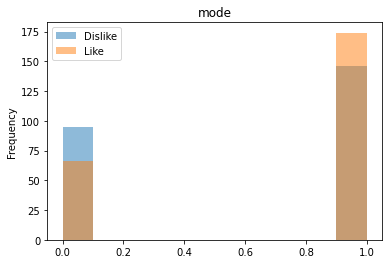

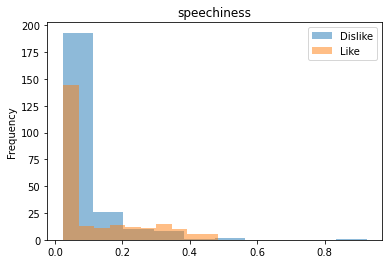

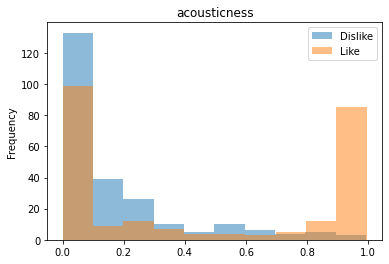

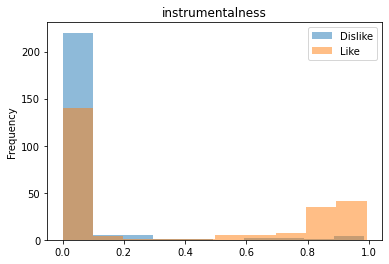

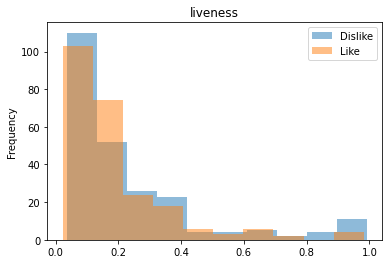

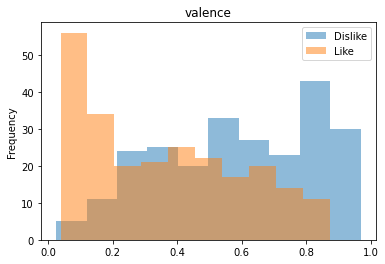

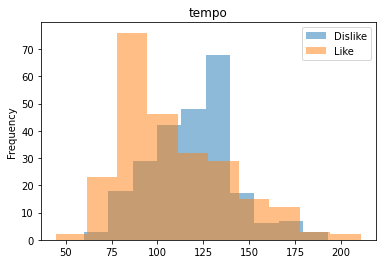

In [109]:
for x in df.columns:
    if x != "Label":
        df.loc[df["Label"]==0,x].plot.hist(alpha=0.5)
        df.loc[df["Label"]==1,x].plot.hist(alpha=0.5)
        plt.legend(["Dislike", "Like"])
        plt.title(x)
        plt.show()

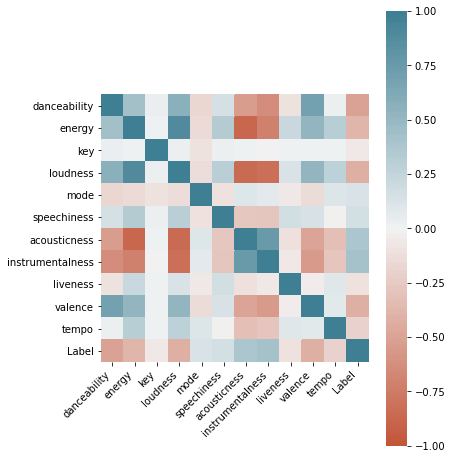

In [110]:
plt.figure(figsize=(6,8))
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [129]:
y = df["Label"]
X = df.drop(["Label", "loudness", "tempo"], axis=1)
# X = df[["danceability", "valence", "tempo", "loudness"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [130]:
lr = LogisticRegression(random_state=42, solver='lbfgs').fit(X_train, y_train)
predicted = lr.predict(X_test)

In [93]:
# lr.predict_proba(X_test).round(3)

array([[0.489, 0.511],
       [0.534, 0.466],
       [0.489, 0.511],
       [0.232, 0.768],
       [0.505, 0.495],
       [0.069, 0.931],
       [0.675, 0.325],
       [0.589, 0.411],
       [0.513, 0.487],
       [0.72 , 0.28 ],
       [0.681, 0.319],
       [0.531, 0.469],
       [0.189, 0.811],
       [0.523, 0.477],
       [0.401, 0.599],
       [0.353, 0.647],
       [0.594, 0.406],
       [0.73 , 0.27 ],
       [0.156, 0.844],
       [0.077, 0.923],
       [0.049, 0.951],
       [0.464, 0.536],
       [0.649, 0.351],
       [0.102, 0.898],
       [0.374, 0.626],
       [0.525, 0.475],
       [0.595, 0.405],
       [0.198, 0.802],
       [0.621, 0.379],
       [0.56 , 0.44 ],
       [0.445, 0.555],
       [0.825, 0.175],
       [0.328, 0.672],
       [0.754, 0.246],
       [0.365, 0.635],
       [0.635, 0.365],
       [0.545, 0.455],
       [0.096, 0.904],
       [0.807, 0.193],
       [0.513, 0.487],
       [0.631, 0.369],
       [0.044, 0.956],
       [0.296, 0.704],
       [0.0

In [95]:
accuracy_score(y_test, predicted)

0.7379310344827587